# TASK 1 TITANIC SURVIVAL PREDICTION (CODSOFT)

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


# IMPORTING DATASET 

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Exploratory Data Analysis 
Let's begim some EDA ! We'll start by checking out missing data!

In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

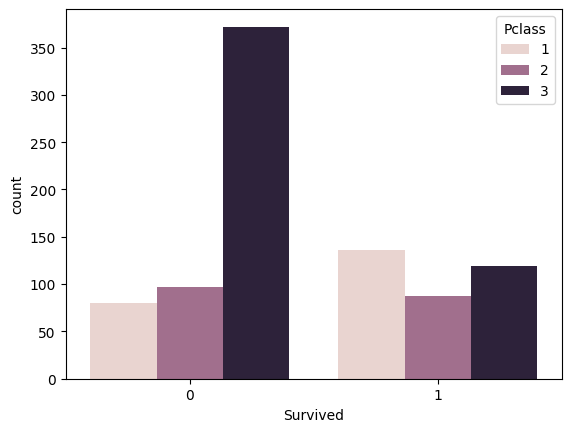

In [7]:
# let's visualize the count of survivals with Pclass
sns.countplot(x=df['Survived'],hue=df['Pclass'])

In [8]:
df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

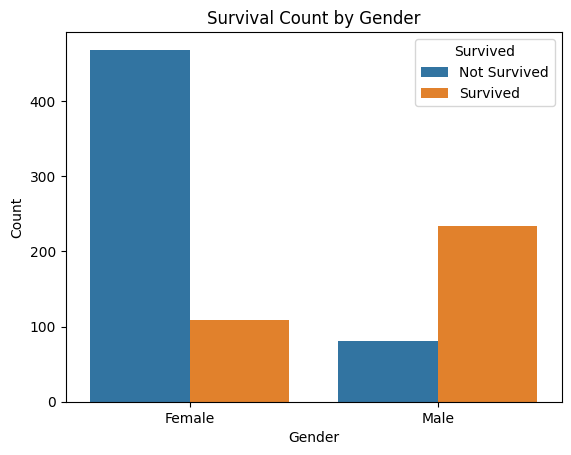

In [9]:
# Assuming df is your DataFrame  
sns.countplot(x='Sex', hue='Survived', data=df)  
sns.set_palette("deep")  

plt.title('Survival Count by Gender')  
plt.xlabel('Gender')  
plt.ylabel('Count')  
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Set custom x-axis labels  
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])  
plt.show()

In [10]:
#Look at survival rate by sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex'] = labelencoder.fit_transform(df['Sex'])  # here we transforming male cateogry to index 1, and female cateogry to index 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df['Sex'],df['Survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: int32,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

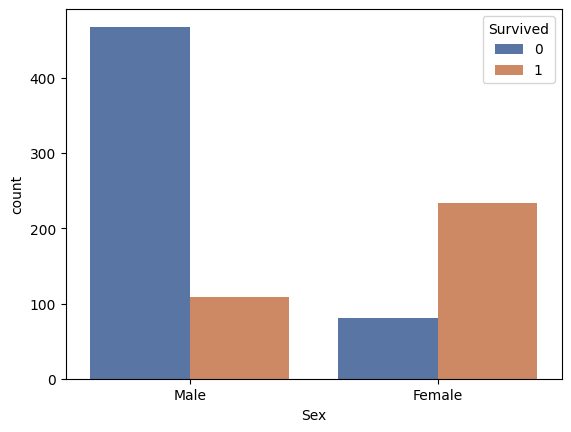

In [14]:
df['Sex'] = df['Sex'].map({0: 'Female', 1: 'Male'})  

sns.countplot(x='Sex', hue='Survived', data=df) 

In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#After dropping non required column 
df=df.drop(['Age'],axis=1)

In [17]:
df=df.drop(['Cabin'],axis=1)

In [18]:
df_final =df
df_final.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",Male,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",Male,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",Male,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",Male,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Female,1,0,237736,30.0708,C


# Model Training

In [19]:
# Here these two coulmns are needfull for traning the model 
X = df[['Pclass', 'Sex']]  
Y = df['Survived']

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0) 
log.fit (X_train, Y_train)

In [25]:
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  

# Assuming df is your DataFrame  
label_encoder = LabelEncoder()  
df['Sex'] = label_encoder.fit_transform(df['Sex']) 
# Now split your data into features (X) and target (Y)  
X = df[['Pclass', 'Sex']]  
Y = df['Survived'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  

# Fit the model  
log = LogisticRegression(random_state=0)  
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

# Model Prediction 

In [ ]:
pred = print(log.predict(X_test))

In [ ]:
print(Y_test)

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

res=log.predict([[2,1]])   

if(res==0):
    print("Sorry! Not Survived")
else:
    print("Survived")